In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_csv('data/house-price-data.csv')
# house_data_numeric = house_data.select_dtypes(include = ['float64', 'int64'])

In [9]:
print("Head of the dataset:")
print(df.head())
print("Tail of the dataset:")
print(df.tail(), "\n")
print("Info of the dataset:")
df.info()
print()

Head of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


In [10]:
df['SalePriceQ'] = pd.qcut(df['SalePrice'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  SalePriceQ  
0       WD         Normal     208500          Q3  
1       WD         Normal     181500          Q3  
2       WD         Normal     223500          Q4  
3       WD        Abnorml     140000          Q2  
4       WD         Normal     250000          Q4  

[5 rows x 82 columns]

In [11]:
print(df.shape)


(1460, 82)


C:\Users\alanm\AppData\Local\Temp\ipykernel_15000\1065165104.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = df_numerics[column], hue = df['SalePriceQ'], fill = True, ax = axes, palette=quartile_palette)
C:\Users\alanm\AppData\Local\Temp\ipykernel_15000\1065165104.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = df_numerics[column], hue = df['SalePriceQ'], fill = True, ax = axes, palette=quartile_palette)


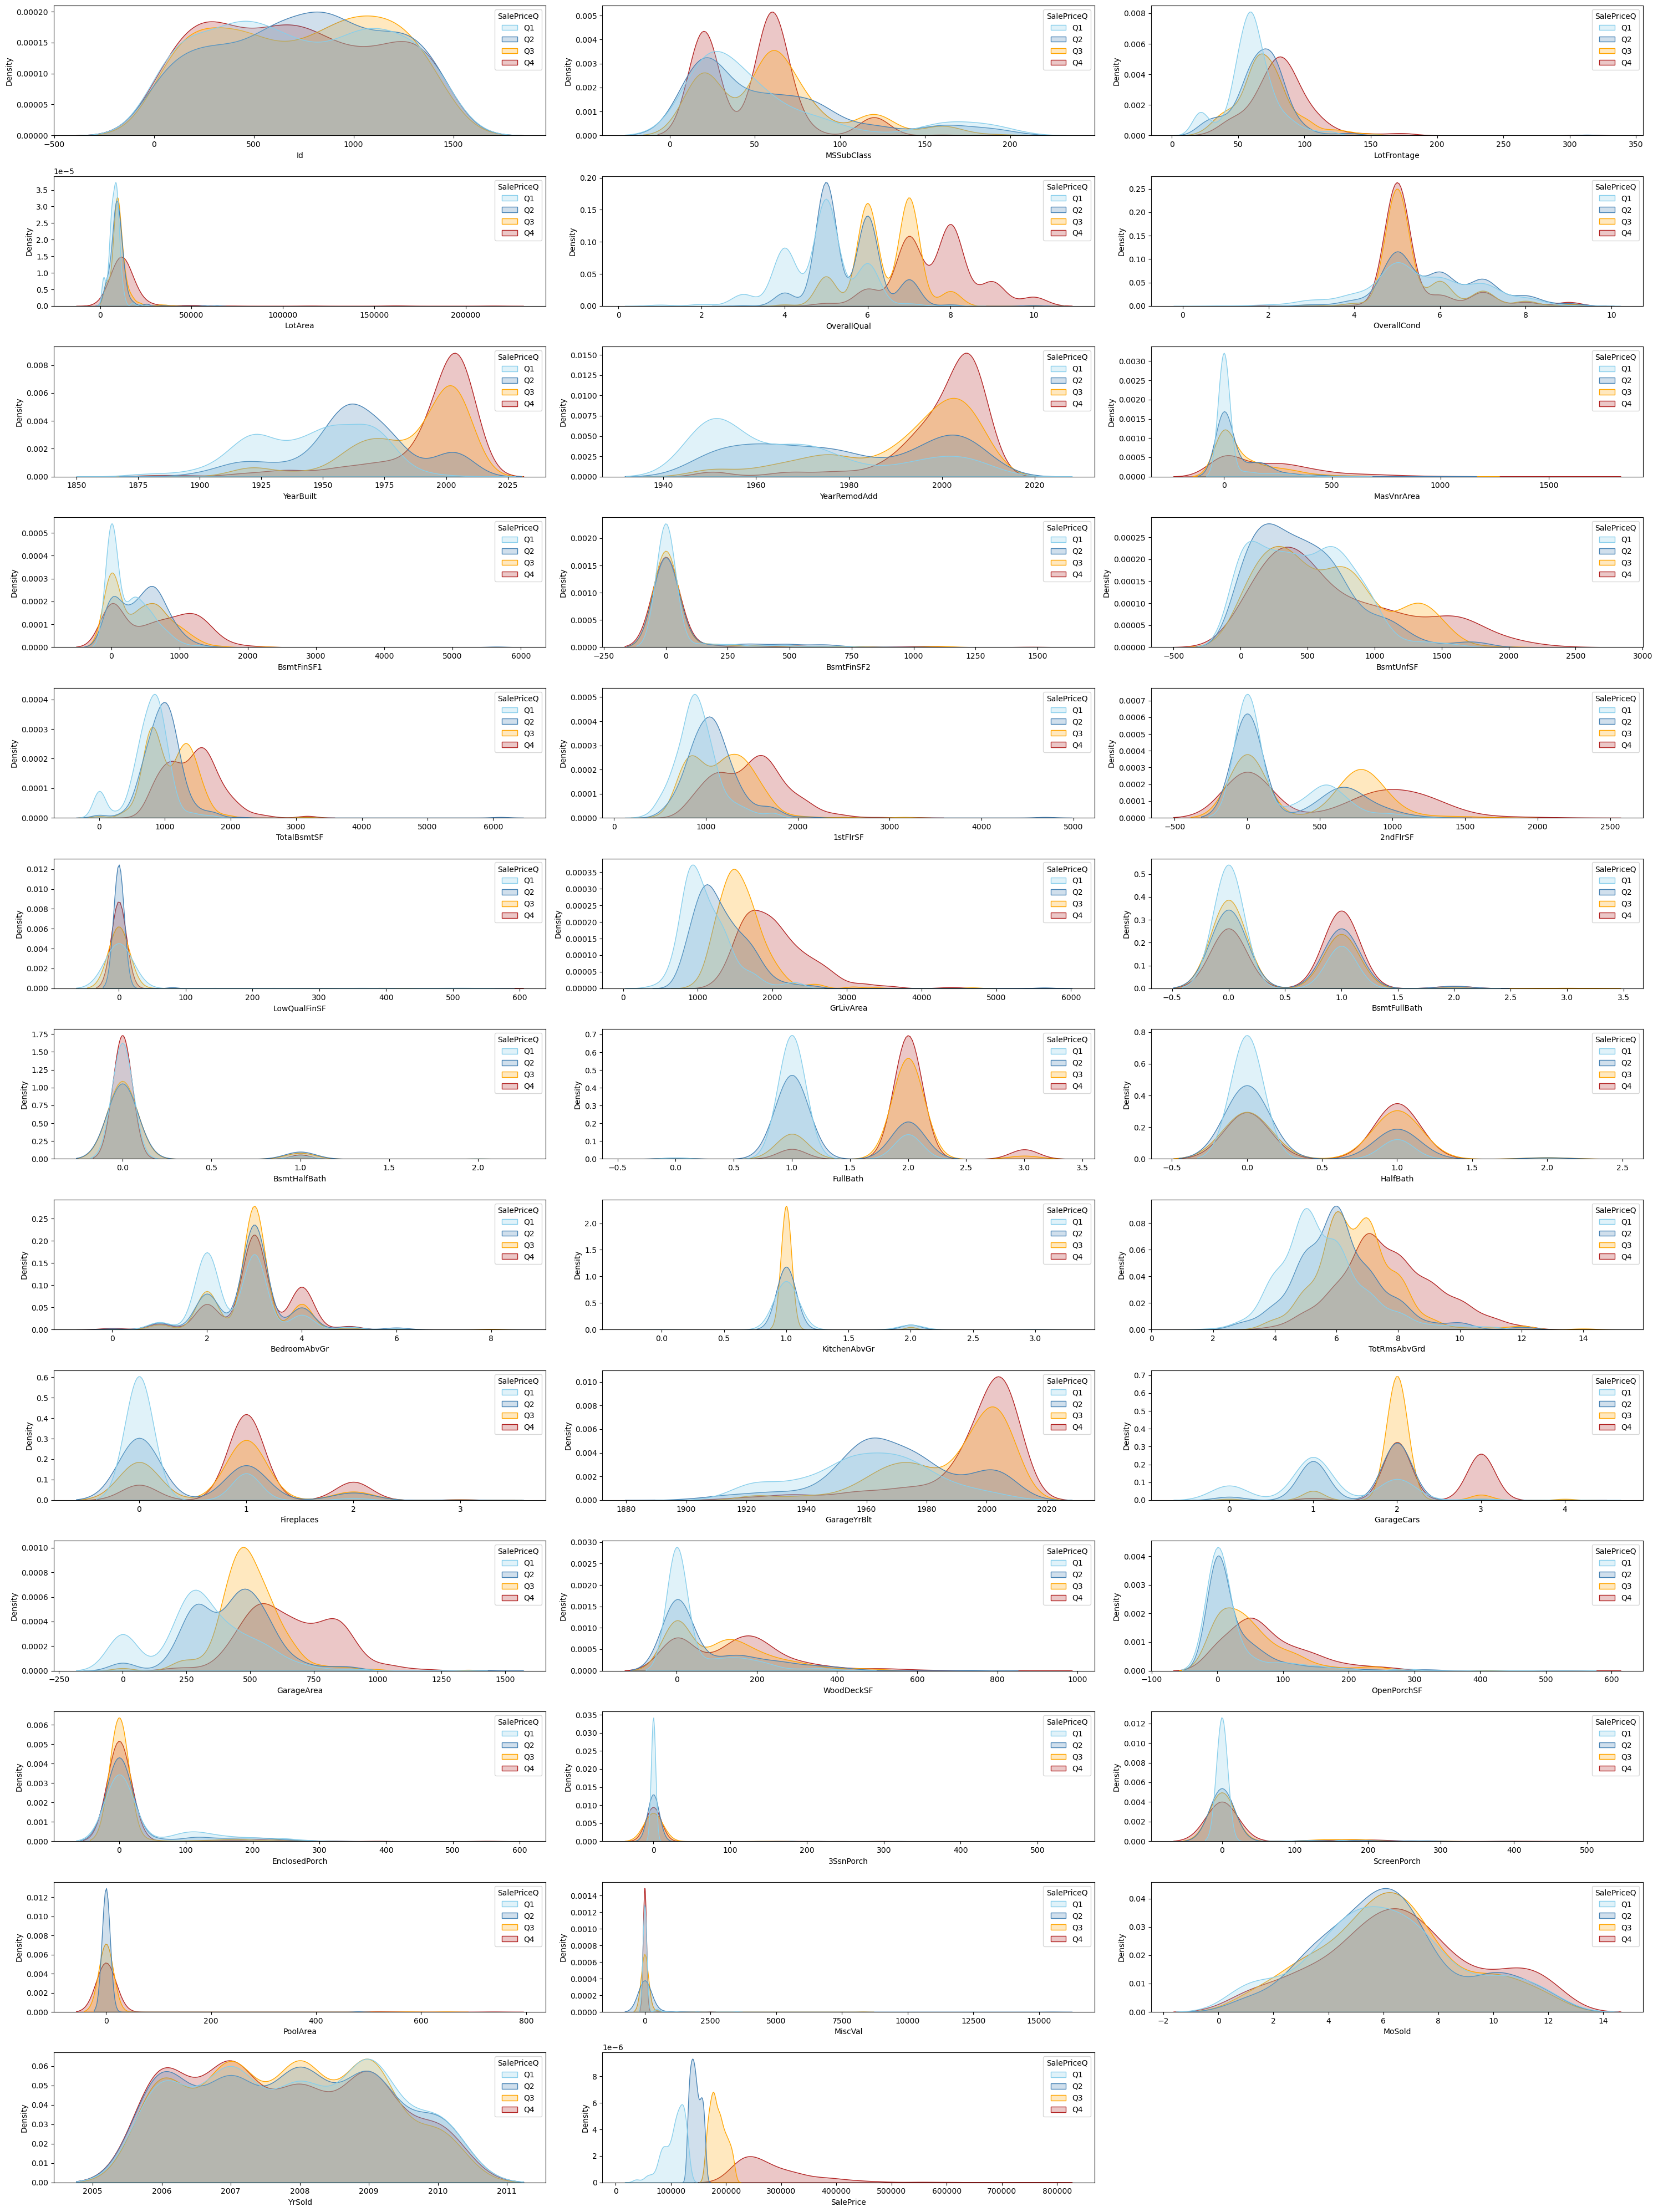

In [19]:
# Gráficas de densidad
df_numerics = df.select_dtypes(include = ['float64', 'int64'])

figure=plt.figure(figsize = (30, 40))

columns = 3
rows = df_numerics.shape[1] // columns + 1

quartile_palette = {
    'Q1': '#87CEEB',  # Azul claro
    'Q2': '#4682B4',  # Azul más oscuro
    'Q3': '#FFA500',  # Naranja
    'Q4': '#B22222'   # Rojo oscuro
}

for i, column in enumerate(df_numerics.columns, 1):
        axes = figure.add_subplot(rows, columns, i)
        sns.kdeplot(x = df_numerics[column], hue = df['SalePriceQ'], fill = True, ax = axes, palette=quartile_palette)
        figure.tight_layout()
plt.show()

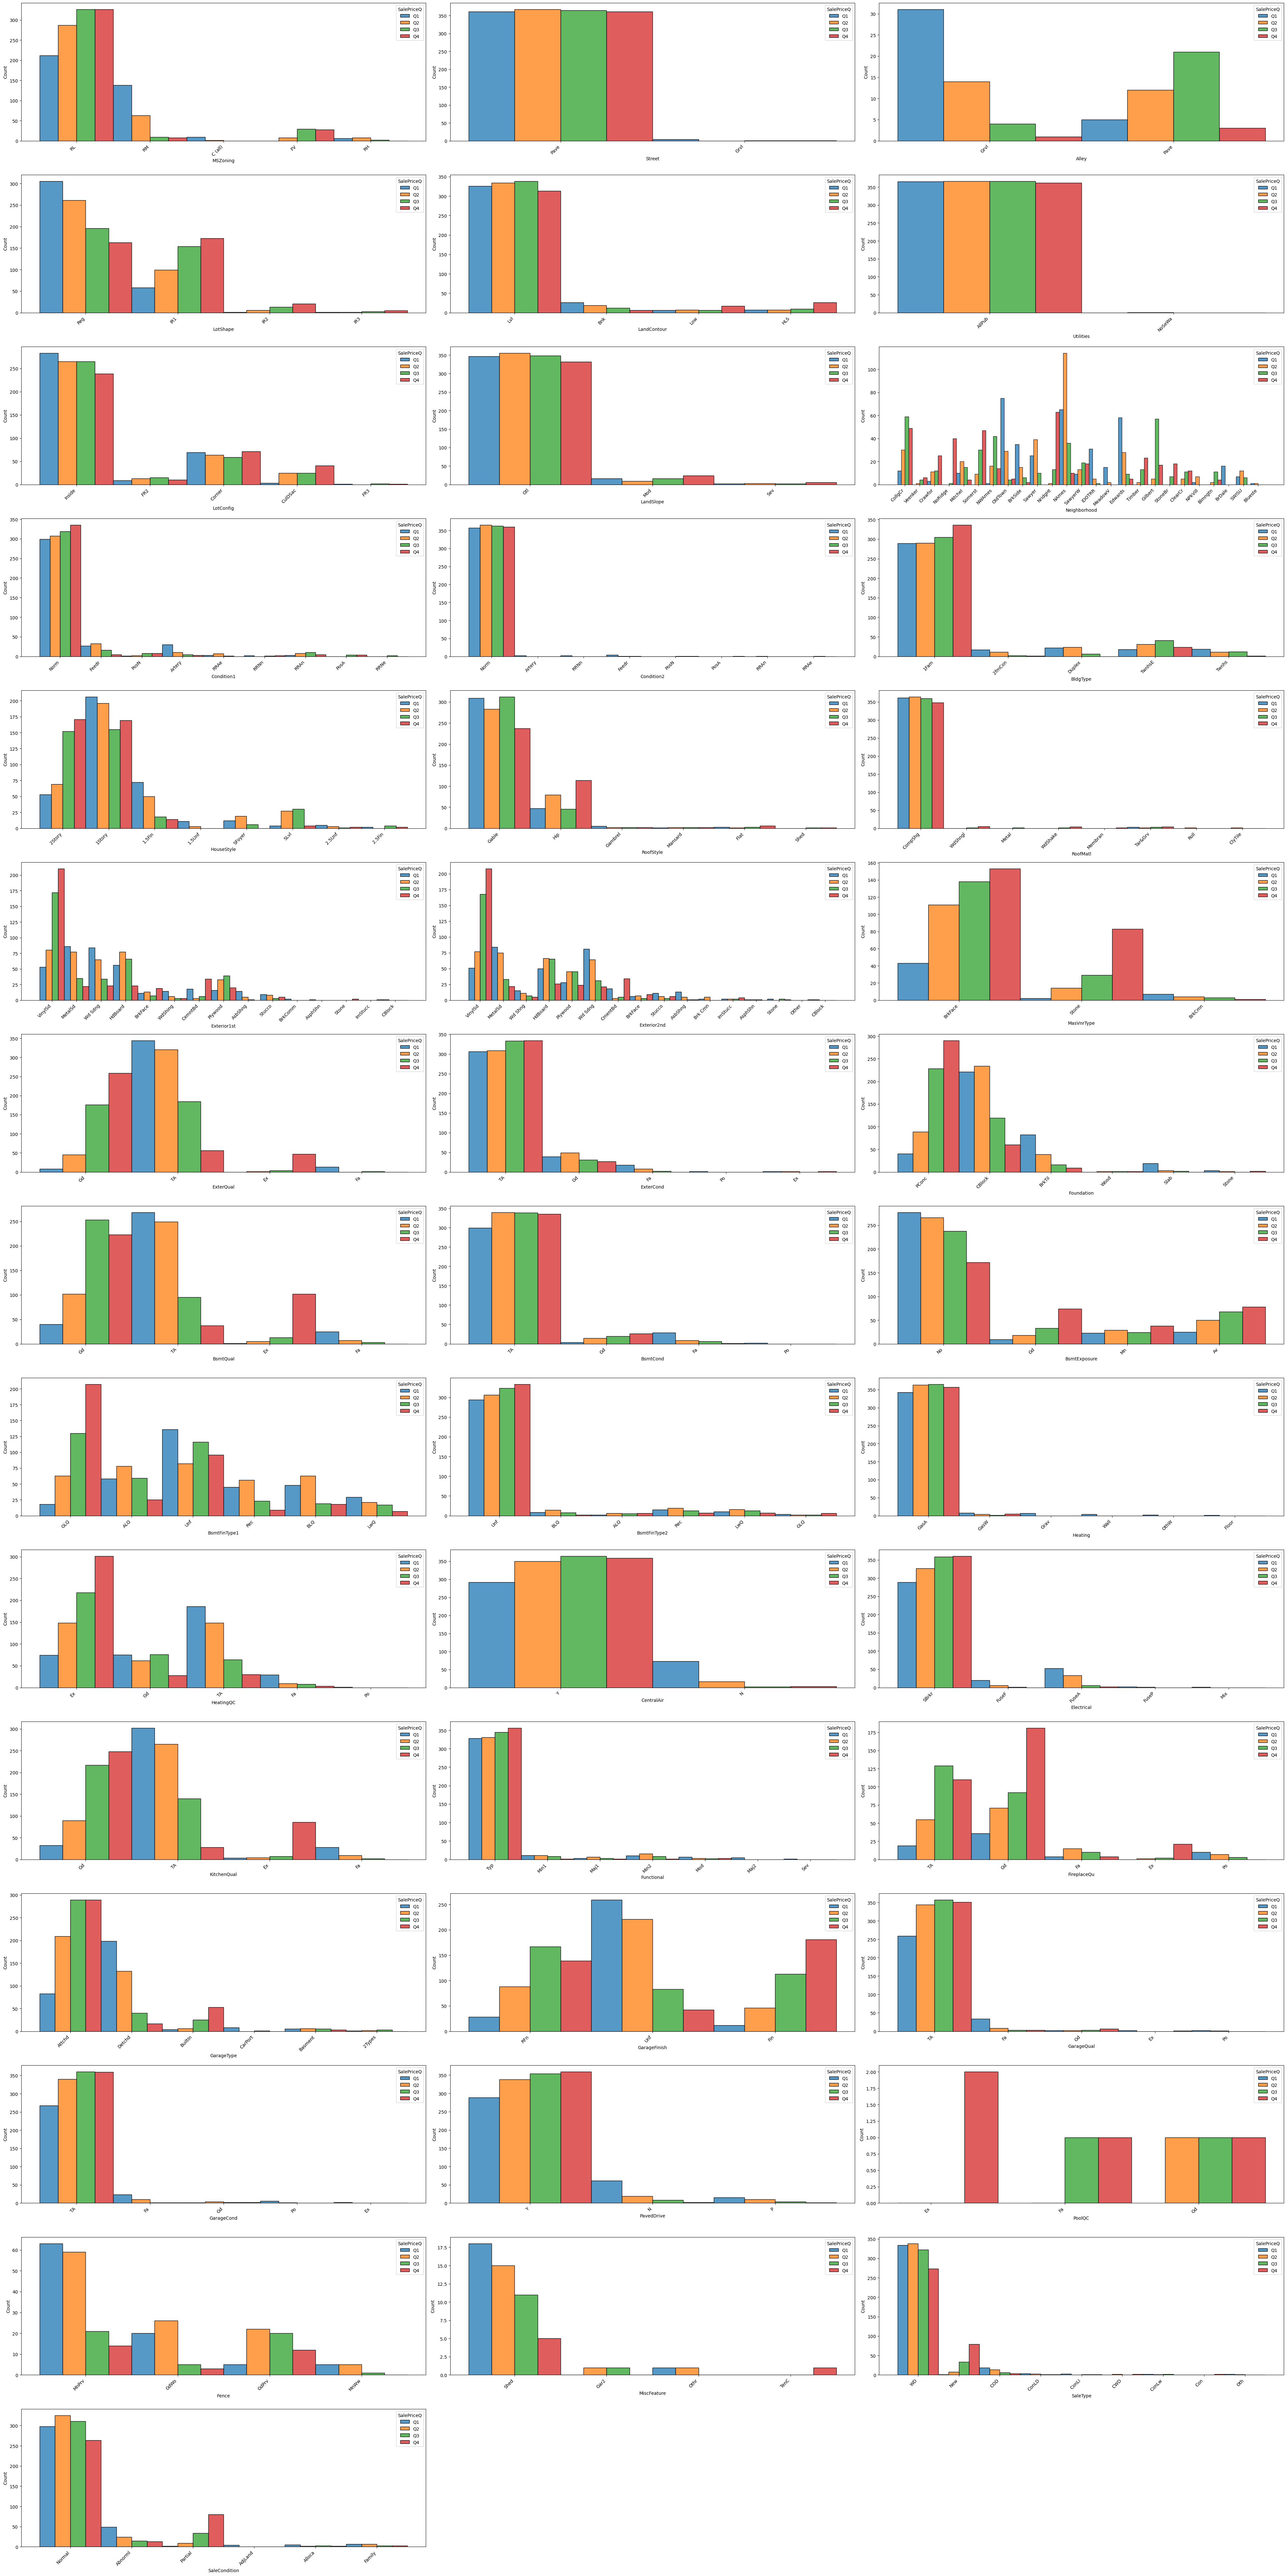

In [ ]:
df_objects = df.select_dtypes(include=['object'])
figure=plt.figure(figsize = (40, 80))

columns = 3
rows = df_objects.shape[1] // columns + 1

quartile_palette = {
    'Q1': '#87CEEB',  # Azul claro
    'Q2': '#4682B4',  # Azul más oscuro
    'Q3': '#FFA500',  # Naranja
    'Q4': '#B22222'   # Rojo oscuro
}

for i, column in enumerate(df_objects.columns, 1):
    axes = figure.add_subplot(rows,columns,i)
    sns.histplot(x = df_objects[column], ax = axes, hue=df['SalePriceQ'], multiple='dodge')
    axes.tick_params(axis='x', rotation=45)
    for label in axes.get_xticklabels():
        label.set_ha('right')  # Align labels to the right
    figure.tight_layout()

plt.show()

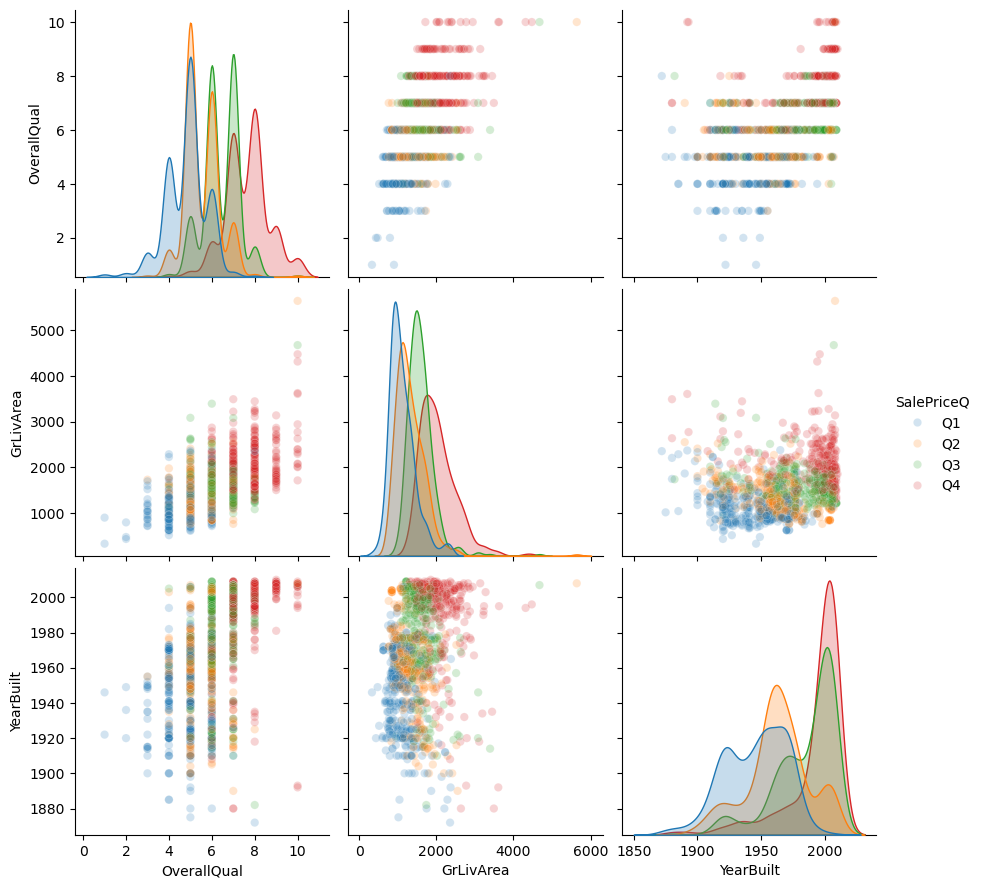

In [20]:
n_samples_to_plot = 5000
quartile_palette = {
    'Q1': '#87CEEB',  # Azul claro
    'Q2': '#4682B4',  # Azul más oscuro
    'Q3': '#FFA500',  # Naranja
    'Q4': '#B22222'   # Rojo oscuro
}
columns = ['OverallQual', 'GrLivArea', 'YearBuilt']
_ = sns.pairplot(data=df[:n_samples_to_plot], vars=columns,
                 hue="SalePriceQ", plot_kws={'alpha': 0.2},
                 height=3, diag_kind='kde')

<Axes: >

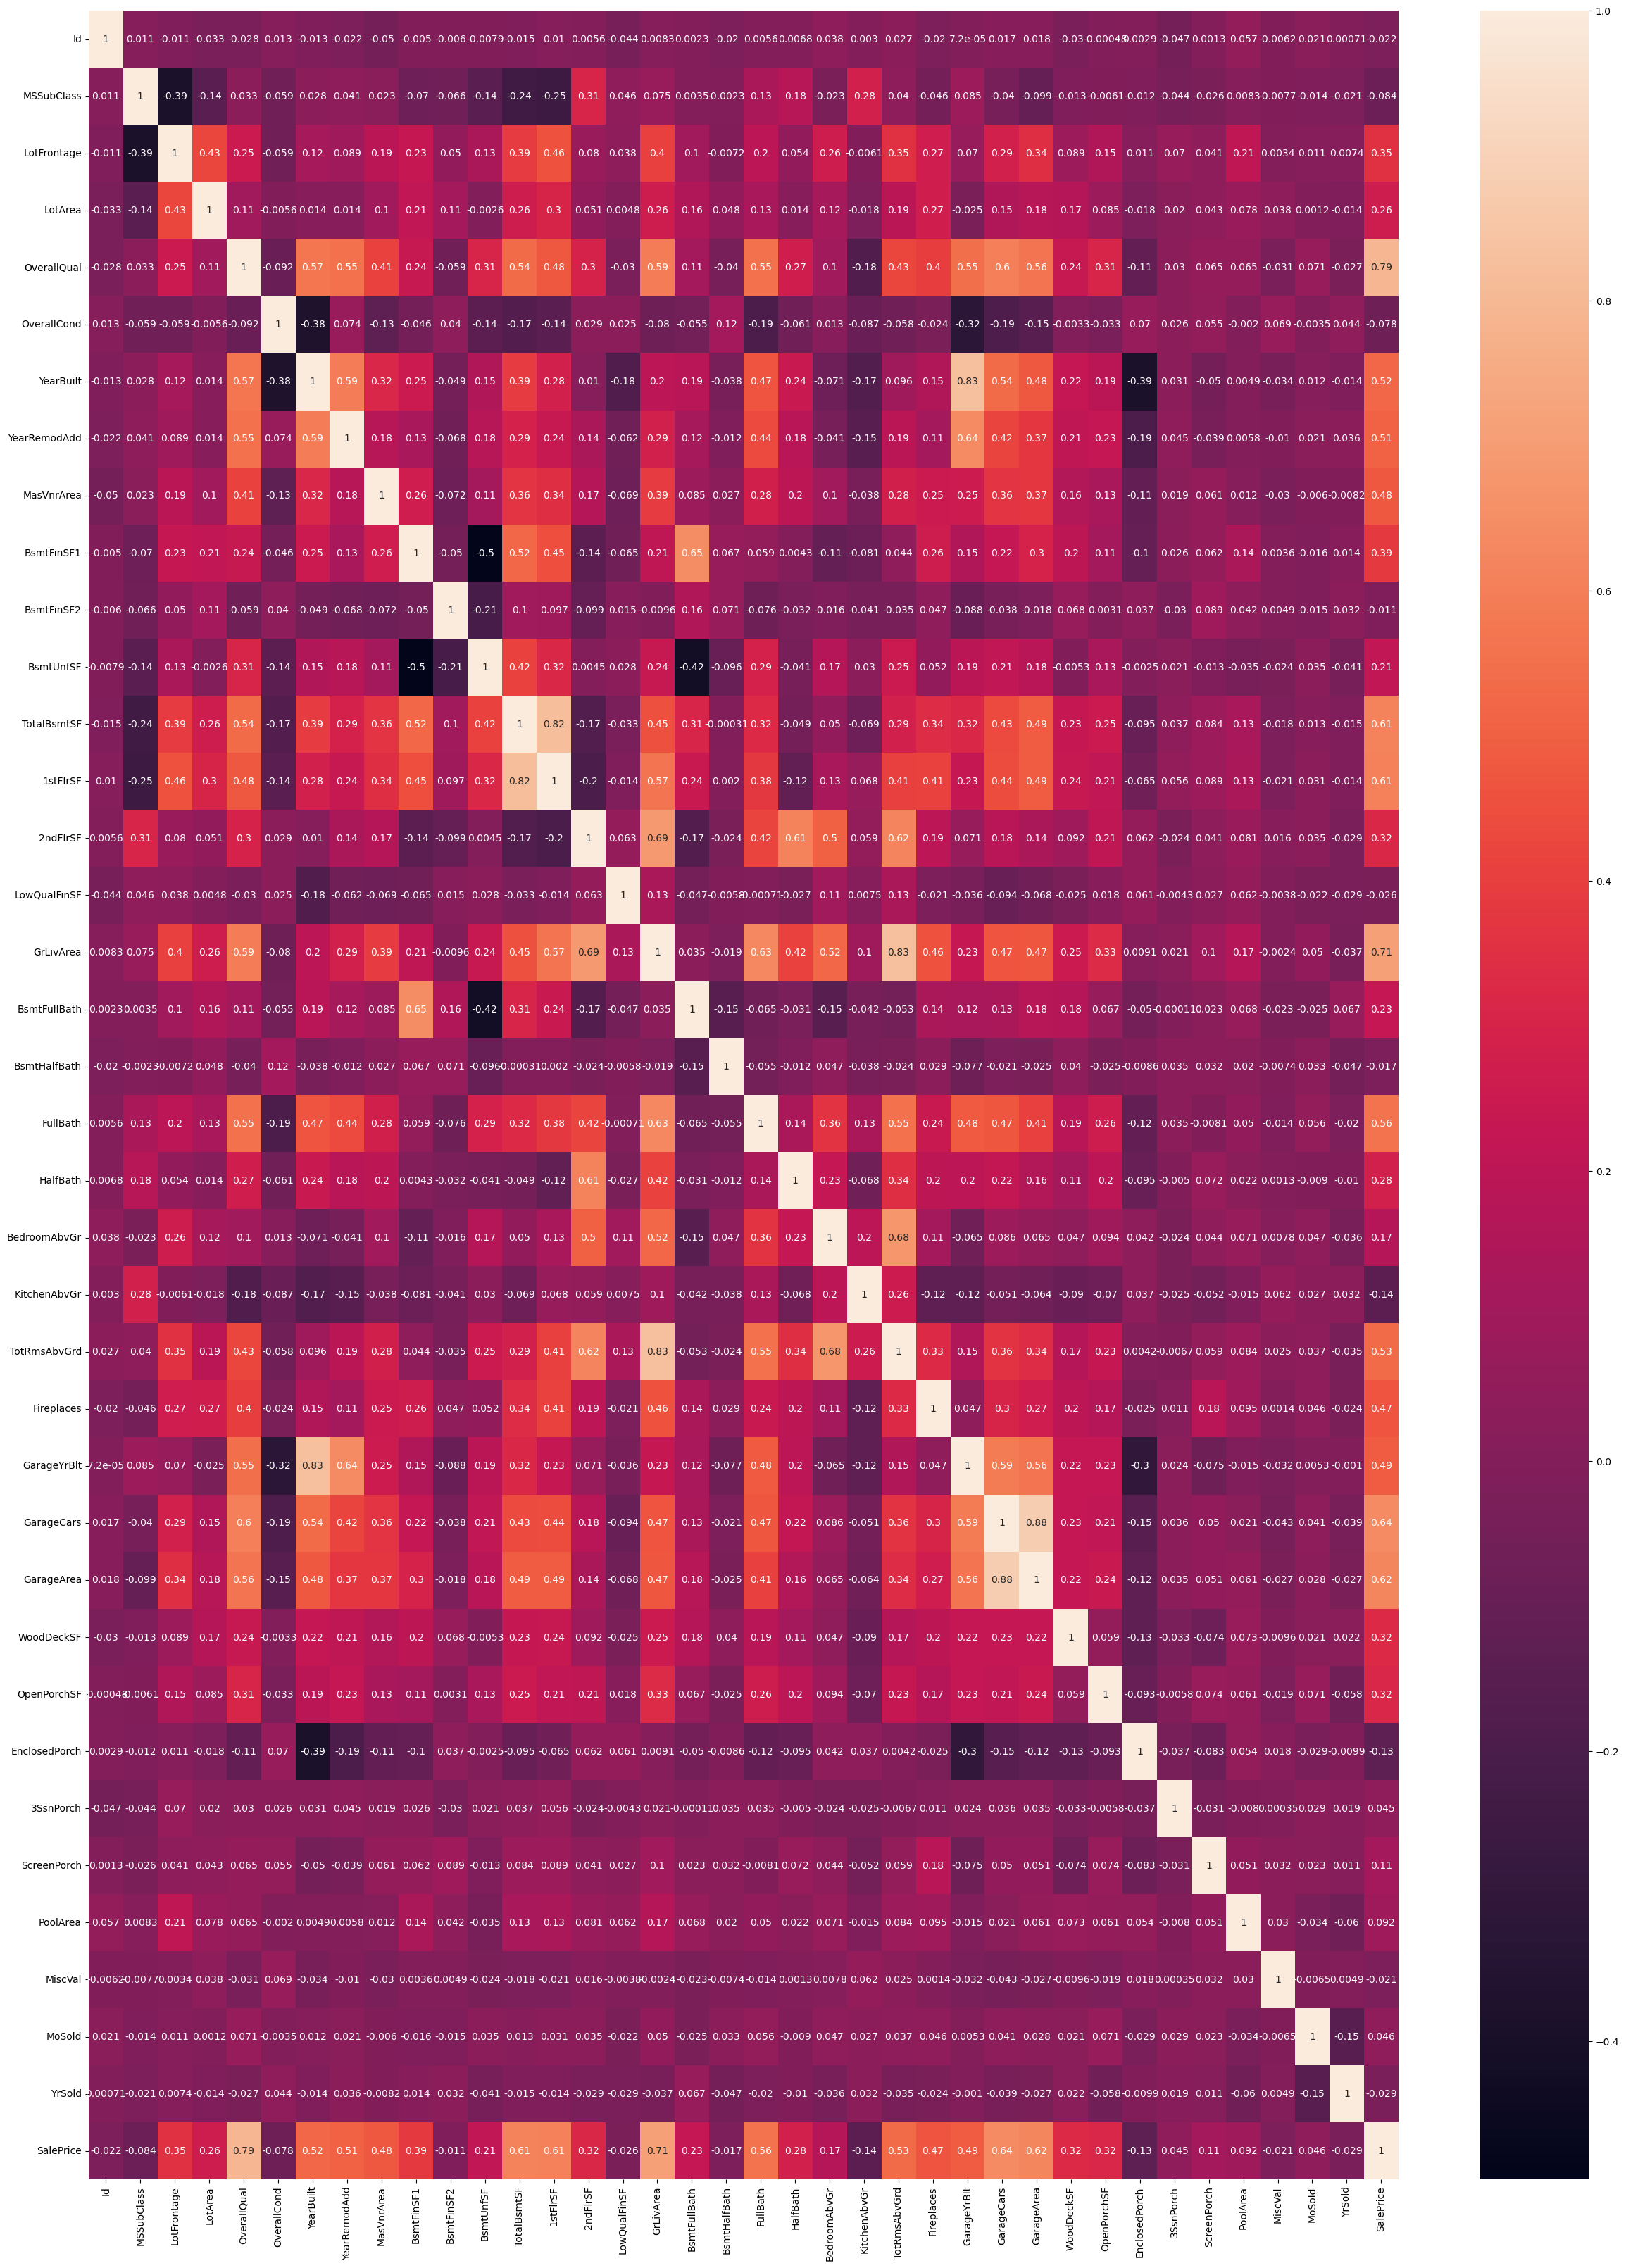

In [21]:
corr_df = df.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(30, 40))
sns.heatmap(corr_df, annot=True)